In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
import numpy as np

In [15]:
import os
os.getcwd()

'C:\\Users\\hp\\Documents\\Battle of Insights'

In [19]:
df = pd.read_excel('transactions.xlsx')

In [20]:
df.head()

,Transaction_ID,Date,Customer_Name,Total_Items,Amount($),Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000667075,2022-09-12 17:40:23,David King,5,30.98,Debit Card,Chicago,Warehouse Club,True,Teenager,Fall,BOGO (Buy One Get One)
1,1000156022,2022-01-20 23:03:20,Michael Williamson,3,23.29,Credit Card,Boston,Warehouse Club,True,Homemaker,Winter,Discount on Selected Items
2,1000681674,2022-10-15 07:49:59,Chelsea Garza,7,25.62,Debit Card,Chicago,Pharmacy,False,Teenager,Fall,Discount on Selected Items
3,1000692089,2024-04-05 09:39:58,Scott Lopez,5,14.64,Mobile Payment,Atlanta,Pharmacy,False,Homemaker,Summer,Discount on Selected Items
4,1000328702,2021-05-28 04:16:54,Crystal Adams,4,62.27,Credit Card,Miami,Convenience Store,False,Retiree,Summer,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38500 entries, 0 to 38499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     38500 non-null  int64  
 1   Date               38500 non-null  object 
 2   Customer_Name      38500 non-null  object 
 3   Total_Items        38500 non-null  int64  
 4   Amount($)          38500 non-null  float64
 5   Payment_Method     38500 non-null  object 
 6   City               38500 non-null  object 
 7   Store_Type         38500 non-null  object 
 8   Discount_Applied   38500 non-null  bool   
 9   Customer_Category  38500 non-null  object 
 10  Season             38500 non-null  object 
 11  Promotion          25529 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 3.3+ MB


In [22]:
df.isnull().sum()

Transaction_ID           0
Date                     0
Customer_Name            0
Total_Items              0
Amount($)                0
Payment_Method           0
City                     0
Store_Type               0
Discount_Applied         0
Customer_Category        0
Season                   0
Promotion            12971
dtype: int64

In [23]:
df = df.dropna()

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df = df.drop_duplicates()

In [ ]:
  #Analysis of the questions

In [ ]:
  #1. What is the average transaction amount ($) across different store types, and how does it vary by season?

In [29]:
avg_amount_by_store_season = df.groupby(['Store_Type', 'Season'])['Amount($)'].mean().reset_index()
avg_amount_by_store_season

,Store_Type,Season,Amount($)
0,Convenience Store,Fall,53.438270
1,Convenience Store,Spring,53.757065
2,Convenience Store,Summer,53.062141
3,Convenience Store,Winter,51.344425
4,Department Store,Fall,51.232549
5,Department Store,Spring,52.306885
6,Department Store,Summer,52.250631
7,Department Store,Winter,51.681063
8,Pharmacy,Fall,52.776136
9,Pharmacy,Spring,52.680579


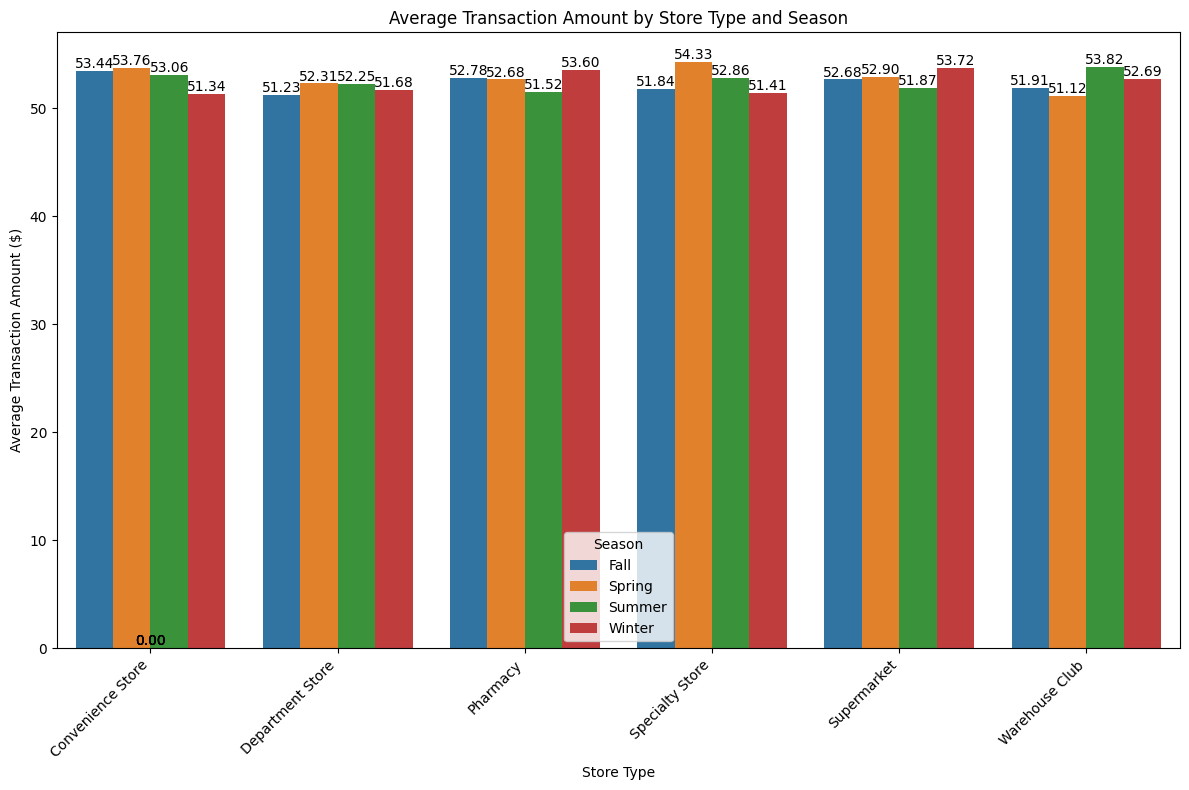

In [34]:
# Visualizing the average transaction amount by Store Type and Season
average_transaction = df.groupby(['Store_Type', 'Season'])['Amount($)'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 8))  # Increase figure size
ax = sns.barplot(x='Store_Type', y='Amount($)', hue='Season', data=average_transaction, dodge=True)

# Adding labels and title
plt.title('Average Transaction Amount by Store Type and Season')
plt.xlabel('Store Type')
plt.ylabel('Average Transaction Amount ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Annotate each bar with the value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Display the height value (amount) rounded to 2 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the label
                ha='center', va='center',  # Center the label
                fontsize=10, color='black',  # Font size and color
                xytext=(0, 5), textcoords='offset points')  # Adjust label position slightly above the bar

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#2. Which payment method is most commonly used in high-value transactions (above the average transaction amount), and how does it differ across cities?

In [35]:

average_transaction_amount = df['Amount($)'].mean()


high_value_transactions = df[df['Amount($)'] > average_transaction_amount]


payment_method_counts = high_value_transactions.groupby(['City', 'Payment_Method']).size().reset_index(name='Count')


most_common_payment_method = payment_method_counts.loc[payment_method_counts.groupby('City')['Count'].idxmax()]


most_common_payment_method


,City,Payment_Method,Count
3,Atlanta,Mobile Payment,318
6,Boston,Debit Card,323
8,Chicago,Cash,351
14,Dallas,Debit Card,338
16,Houston,Cash,331
22,Los Angeles,Debit Card,354
27,Miami,Mobile Payment,328
31,New York,Mobile Payment,356
33,San Francisco,Credit Card,336
38,Seattle,Debit Card,345


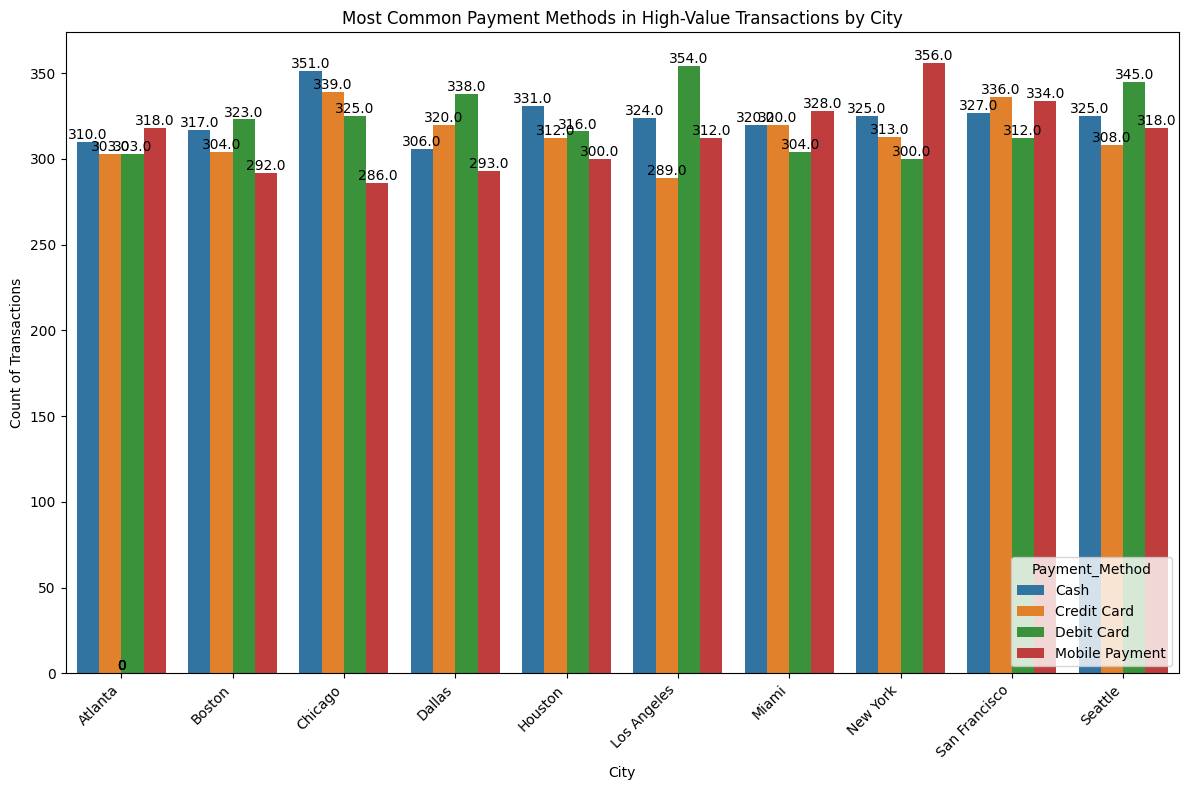

In [37]:
# visualization of the most common payment methods across cities
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='City', y='Count', hue='Payment_Method', data=payment_method_counts)

# Adding labels and title
plt.title('Most Common Payment Methods in High-Value Transactions by City')
plt.xlabel('City')
plt.ylabel('Count of Transactions')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # Display the height value (count of transactions)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the label
                ha='center', va='center',  # Center the label
                fontsize=10, color='black',  # Font size and color
                xytext=(0, 5), textcoords='offset points')  # Adjust label position slightly above the bar

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#How do the sales amounts in transactions with discounts compare to those without discounts, and what trends can be observed over the month?

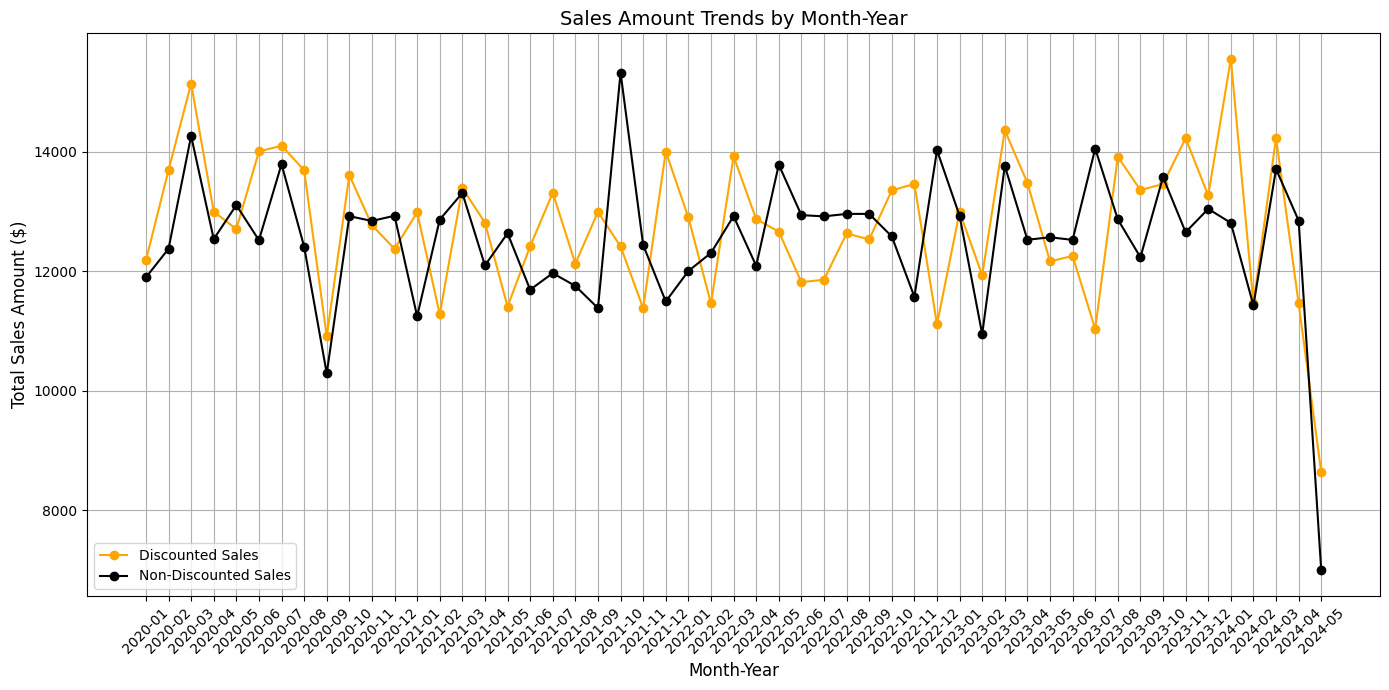

In [57]:
# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Month-Year for trend analysis
df['Month_Year'] = df['Date'].dt.to_period('M').astype(str)

# Filter data for transactions with and without discounts
discounted = df[df['Discount_Applied'] == True]
non_discounted = df[df['Discount_Applied'] == False]

# Calculate total sales amounts for each category by month-year
discounted_sales = discounted.groupby('Month_Year')['Amount($)'].sum()
non_discounted_sales = non_discounted.groupby('Month_Year')['Amount($)'].sum()

# Plotting the trends over the month-years
plt.figure(figsize=(14, 7))

plt.plot(discounted_sales.index, discounted_sales.values, label='Discounted Sales', marker='o', color='orange')
plt.plot(non_discounted_sales.index, non_discounted_sales.values, label='Non-Discounted Sales', marker='o', color='black')

plt.title('Sales Amount Trends by Month-Year', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Sales Amount ($)', fontsize=12)
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [63]:


# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Month-Year for trend analysis
df['Month_Year'] = df['Date'].dt.to_period('M').astype(str)

# Filter data for transactions with and without discounts
discounted = df[df['Discount_Applied'] == True]
non_discounted = df[df['Discount_Applied'] == False]

# Calculate total sales amounts for each category by month-year
discounted_sales = discounted.groupby('Month_Year')['Amount($)'].sum()
non_discounted_sales = non_discounted.groupby('Month_Year')['Amount($)'].sum()

# Combine the results into a single DataFrame for comparison
sales_comparison = pd.DataFrame({
    'Discounted Sales': discounted_sales,
    'Non-Discounted Sales': non_discounted_sales
}).fillna(0)

# Display the sales comparison table
print(sales_comparison)

# Calculate percentage contribution of discounted sales
sales_comparison['Percentage Discounted'] = (
    sales_comparison['Discounted Sales'] /
    (sales_comparison['Discounted Sales'] + sales_comparison['Non-Discounted Sales']) * 100
).round(2)

# Display summary statistics
summary = sales_comparison.describe()
print("\nSummary Statistics:")
print(summary)


            Discounted Sales  Non-Discounted Sales
Month_Year                                        
2020-01             12180.68              11894.64
2020-02             13688.90              12373.32
2020-03             15135.02              14260.65
2020-04             12993.75              12535.54
2020-05             12703.03              13103.51
2020-06             14000.66              12516.82
2020-07             14096.61              13788.11
2020-08             13687.65              12408.90
2020-09             10907.76              10289.02
2020-10             13604.76              12918.96
2020-11             12766.64              12838.57
2020-12             12372.41              12926.03
2021-01             12981.77              11243.57
2021-02             11276.57              12862.13
2021-03             13387.55              13306.54
2021-04             12811.53              12094.69
2021-05             11406.00              12632.77
2021-06             12414.76   

In [ ]:
#What are the top three cities with the highest average number of items per transaction, and how do their sales amounts vary across seasons?

Top 3 Cities with Highest Average Items per Transaction:
City
Houston    5.547266
Chicago    5.538701
Miami      5.532125
Name: Total_Items, dtype: float64


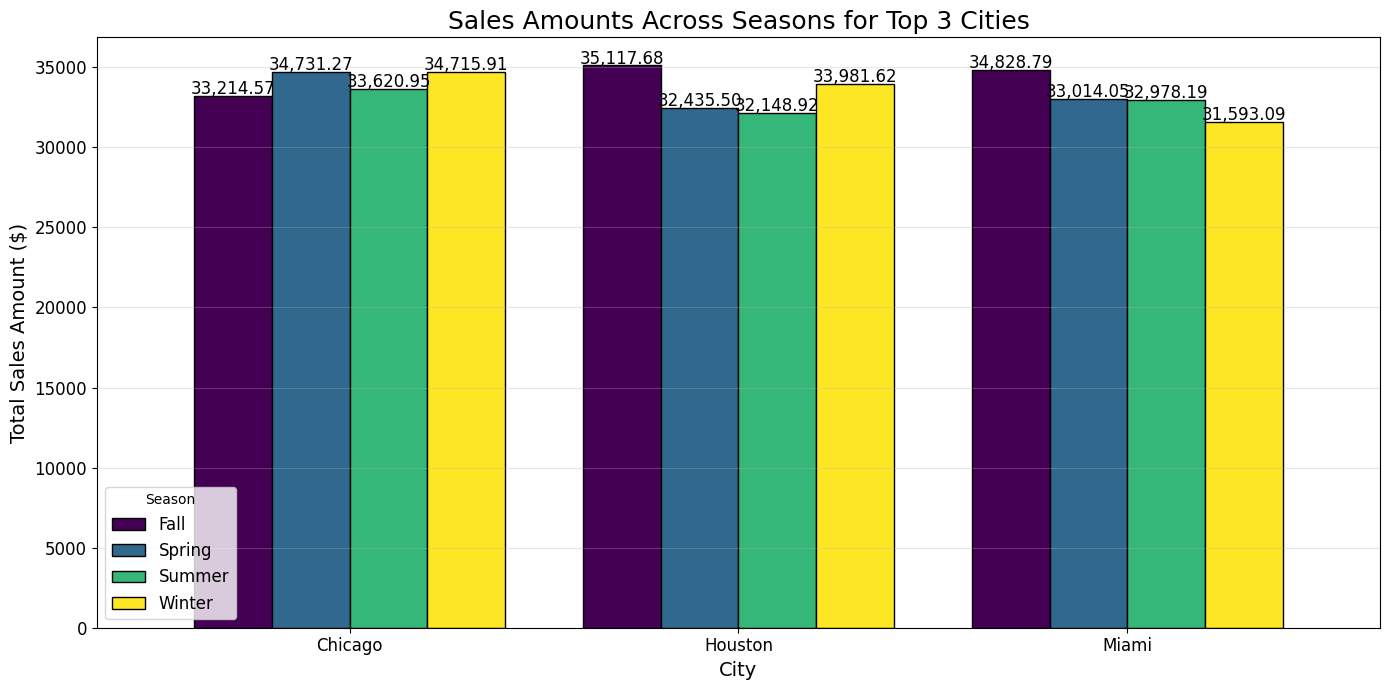

In [69]:
# Calculate average items per transaction for each city

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the average number of items per transaction for each city
city_avg_items = df.groupby('City')['Total_Items'].mean().sort_values(ascending=False)

# Get the top three cities
top_cities = city_avg_items.head(3).index
print("Top 3 Cities with Highest Average Items per Transaction:")
print(city_avg_items.head(3))

# Filter the data for the top three cities
top_cities_data = df[df['City'].isin(top_cities)]

# Group the data by City and Season to calculate total sales amounts
city_season_sales = top_cities_data.groupby(['City', 'Season'])['Amount($)'].sum().unstack()

# Create a bar chart with more space and larger figure size
fig, ax = plt.subplots(figsize=(14, 7))  # Increase figure size
city_season_sales.plot(kind='bar', ax=ax, colormap='viridis', edgecolor='black', width=0.8)

# Add data labels with adjusted position
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.2f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Customize the chart for better readability
plt.title('Sales Amounts Across Seasons for Top 3 Cities', fontsize=18)
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Sales Amount ($)', fontsize=14)
plt.legend(title='Season', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Show the chart
plt.show()

In [70]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the average number of items per transaction for each city
city_avg_items = df.groupby('City')['Total_Items'].mean().sort_values(ascending=False)

# Get the top three cities with the highest average items per transaction
top_cities = city_avg_items.head(3)
print("Top 3 Cities with Highest Average Items per Transaction:")
print(top_cities)

# Filter the data for the top three cities
top_cities_data = df[df['City'].isin(top_cities.index)]

# Group the data by City and Season to calculate total sales amounts
city_season_sales = top_cities_data.groupby(['City', 'Season'])['Amount($)'].sum().unstack()

# Display the sales data for each season per city
print("\nSales Amounts Across Seasons for Top 3 Cities:")
print(city_season_sales)

# Calculate total sales and average sales per season for each city
city_season_avg_sales = city_season_sales.mean(axis=1)
print("\nAverage Sales per Season for Each City:")
print(city_season_avg_sales)

# Calculate the total sales for each city across all seasons
total_sales_per_city = city_season_sales.sum(axis=1)
print("\nTotal Sales Across All Seasons for Each City:")
print(total_sales_per_city)

# Perform seasonal comparison by calculating the difference in sales between peak season and off-peak season
peak_season_sales = city_season_sales.max(axis=1)
off_peak_season_sales = city_season_sales.min(axis=1)
seasonal_difference = peak_season_sales - off_peak_season_sales
print("\nSeasonal Sales Difference (Peak - Off-Peak) for Each City:")
print(seasonal_difference)

Top 3 Cities with Highest Average Items per Transaction:
City
Houston    5.547266
Chicago    5.538701
Miami      5.532125
Name: Total_Items, dtype: float64

Sales Amounts Across Seasons for Top 3 Cities:
Season       Fall    Spring    Summer    Winter
City                                           
Chicago  33214.57  34731.27  33620.95  34715.91
Houston  35117.68  32435.50  32148.92  33981.62
Miami    34828.79  33014.05  32978.19  31593.09

Average Sales per Season for Each City:
City
Chicago    34070.675
Houston    33420.930
Miami      33103.530
dtype: float64

Total Sales Across All Seasons for Each City:
City
Chicago    136282.70
Houston    133683.72
Miami      132414.12
dtype: float64

Seasonal Sales Difference (Peak - Off-Peak) for Each City:
City
Chicago    1516.70
Houston    2968.76
Miami      3235.70
dtype: float64


In [ ]:
#How effective are different promotions in driving higher transaction amounts, and which promotion type performs best in each season?

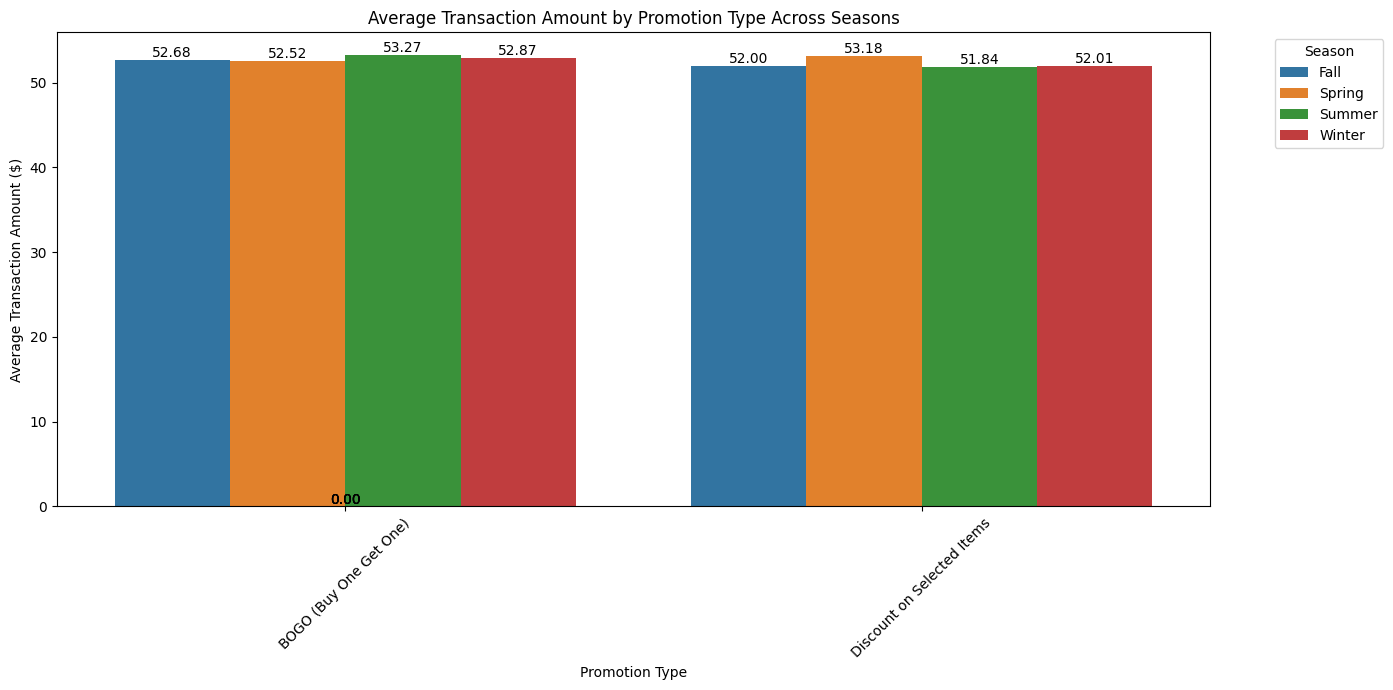

,Promotion,Season,mean,sum,count
0,BOGO (Buy One Get One),Fall,52.678438,167306.72,3176
1,BOGO (Buy One Get One),Spring,52.519019,167483.15,3189
2,BOGO (Buy One Get One),Summer,53.271761,170949.08,3209
3,BOGO (Buy One Get One),Winter,52.872204,166230.21,3144
4,Discount on Selected Items,Fall,51.997053,169042.42,3251
5,Discount on Selected Items,Spring,53.177148,169475.57,3187
6,Discount on Selected Items,Summer,51.842832,166933.92,3220
7,Discount on Selected Items,Winter,52.012388,163995.06,3153


In [74]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from Date column
df['Year_Month'] = df['Date'].dt.to_period('M')

# Filter data based on promotion type
promotion_data = df.groupby(['Promotion', 'Season'])['Amount($)'].agg(['mean', 'sum', 'count']).reset_index()

# Plotting the data
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Promotion', y='mean', hue='Season', data=promotion_data)

# Annotate each bar with its corresponding value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Add title and labels
plt.title('Average Transaction Amount by Promotion Type Across Seasons')
plt.xlabel('Promotion Type')
plt.ylabel('Average Transaction Amount ($)')
plt.xticks(rotation=45)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Insights by promotion type and season
promotion_data